In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('final_merged.csv')

In [4]:
X = df[['Prev Close']].values
y = df['Close'].values

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression()

In [57]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [58]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9992923020835807

Text(0, 0.5, 'Close')

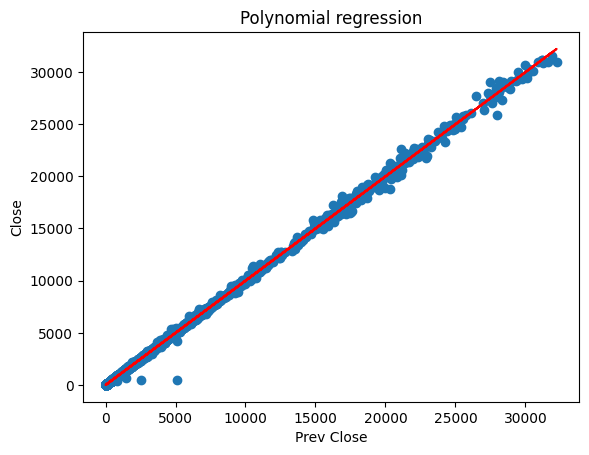

In [62]:
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Polynomial regression')
plt.xlabel('Prev Close')
plt.ylabel('Close')

In [ ]:
int min=INT_MAX;
for(int i=0;i<n;i++)
    if(arr[i]<min)
    min=arr[i];

return min;